In [1]:
import sys

In [2]:
sys.path.insert(0, './ThinkDSP/code')

In [3]:
sys.path.insert(0, './ENML/helper_func/')

In [4]:
import thinkdsp

In [5]:
from en_data_utils import load_dataset

Using TensorFlow backend.
./ENML/helper_func\en_data_utils.py:11: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\Pro

In [6]:
%matplotlib inline

In [7]:
dataset_dir = './data/20171228_class5_len7000'

In [8]:
Ys, labels, Xs, _, _, _ = load_dataset(dataset_dir, test_ratio=0.001)

In [9]:
Ys.shape

(239, 7000)

In [10]:
Xs = Xs / 1000

In [11]:
framerate = 1 / (Xs[0][1] - Xs[0][0])
print(framerate)

1000.0


In [12]:
EN_wave = thinkdsp.Wave(ys=Ys[0], ts=Xs[0], framerate=framerate)

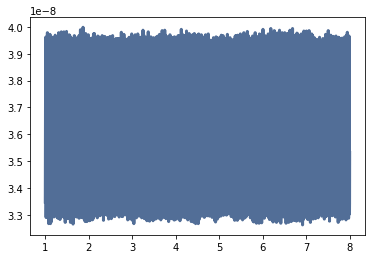

In [13]:
EN_wave.plot()

In [14]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import display

In [15]:
from IPython.display import Audio
audio = Audio(data=EN_wave.ys, rate=EN_wave.framerate)
audio

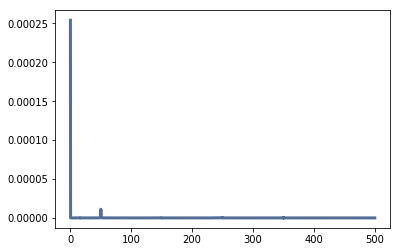

In [16]:
EN_spectrum = EN_wave.make_spectrum()
EN_spectrum.plot()

In [17]:
EN_spectrum.band_stop(low_cutoff=40, high_cutoff=60, factor=0.01)

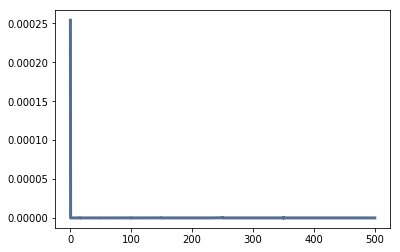

In [19]:
EN_spectrum.plot()

In [22]:
EN_wave_filter = EN_spectrum.make_wave()
EN_wave_filter.play('temp.wav')

Writing temp.wav


In [23]:
labels[0:5]

array([[ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.]])

In [32]:
np.arange(10)+1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [27]:
import numpy as np

In [29]:
y_conc = np.concatenate([Ys[0], Ys[1]])

In [30]:
y_conc.size

14000

In [52]:
EN_conc_wave = thinkdsp.Wave(ys=y_conc*1e7, ts=(np.arange(14000)+1)/4000, framerate=framerate)

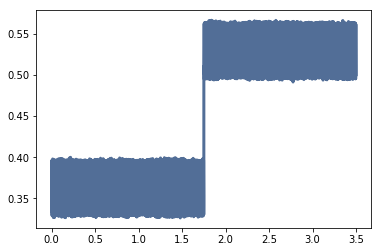

In [53]:
EN_conc_wave.plot()

In [55]:
EN_conc_wave.play('EN_conc_wave.wav')

Writing EN_conc_wave.wav
